In [1]:
from google.colab import files
uploaded = files.upload()

Saving final_data.csv to final_data.csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import sklearn
from sklearn.utils import shuffle
# from sklearn.model_selection import train_test_split

%matplotlib inline

df = pd.read_csv('final_data.csv')
df = df.drop(columns=['File Name','Sr'])
df = shuffle(df)
df



,Temperature,Series,Parallel,Shading,Number of cells,Voltage (V),Current (I),I/V,Solar Panel,Cell Number,Shade Percentage,IsShade
101372,50,5,2,9,10,0.93,4.34,4.67,10747,3,90.00,1
45018,35,3,3,7,9,1.39,6.18,4.44,4750,4,77.78,1
18764,30,10,1,2,10,0.45,2.19,4.87,1978,5,20.00,0
46931,35,4,2,6,8,0.72,4.35,6.04,4983,8,75.00,0
38616,35,10,1,6,10,4.57,2.16,0.47,4067,7,60.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48632,35,5,2,2,10,1.53,6.52,4.26,5170,3,20.00,0
50778,35,5,2,9,10,1.99,4.33,2.18,5384,9,90.00,1
85076,50,10,1,0,10,3.57,4.33,1.21,9016,7,0.00,0
9480,27,2,5,8,10,0.61,13.03,21.36,976,1,80.00,1


In [ ]:
df = df.drop(columns=['File Name'])
df

,Sr. 0,Temperature,Series,Parallel,Shading,Number of cells,Voltage (V),Current (I),I/V,Solar Panel,Cell Number,Shade Percentage,IsShade
42013,42014,35,2,4,6,8,0.74,10.84,14.64,4427,2,75.00,1
84520,84521,45,5,2,9,10,1.01,4.34,4.30,8961,1,90.00,1
66932,66933,40,5,2,7,10,0.33,4.35,13.19,7101,3,70.00,1
72382,72383,45,10,1,6,10,3.83,2.18,0.57,7646,3,60.00,1
31248,31249,30,5,2,10,10,2.89,-9.25,-3.20,3330,9,100.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70951,70952,45,10,1,4,10,1.52,2.18,1.44,7503,2,40.00,1
71229,71230,45,10,1,4,10,4.30,2.18,0.51,7530,10,40.00,0
61686,61687,40,3,3,6,9,0.67,8.68,12.96,6515,4,66.67,1
50800,50801,35,5,2,9,10,2.21,4.24,1.92,5387,1,90.00,1


In [4]:
X = df.drop('IsShade', axis=1)
y = df['IsShade']


In [14]:

from sklearn.model_selection import train_test_split
# implementing train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.34, random_state=66)



In [15]:
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
# random forest model creation
nbc = GaussianNB()
nbc.fit(X_train,y_train)
# predictions
nbc_predict = nbc.predict(X_test)


In [16]:
print('Train set')
train_pred = nbc.predict_proba(X_train)
print('Naive Bayes Classifier roc-auc: {}'.format(roc_auc_score(y_train, train_pred[:,1])))
print('Test set')
test_pred = nbc.predict_proba(X_test)
print('Naive Bayes Classifier roc-auc: {}'.format(roc_auc_score(y_test, test_pred[:,1])))

Train set
Naive Bayes Classifier roc-auc: 0.9375838868901035
Test set
Naive Bayes Classifier roc-auc: 0.9375028655597966


In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

nbc_cv_score = cross_val_score(nbc, X, y, cv=10, scoring='roc_auc')

In [18]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, nbc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, nbc_predict))
print('\n')
print("=== All AUC Scores ===")
print(nbc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", nbc_cv_score.mean())

=== Confusion Matrix ===
[[14865  2400]
 [ 2731 14542]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.84      0.86      0.85     17265
           1       0.86      0.84      0.85     17273

    accuracy                           0.85     34538
   macro avg       0.85      0.85      0.85     34538
weighted avg       0.85      0.85      0.85     34538



=== All AUC Scores ===
[0.94265673 0.93888582 0.93799766 0.93934883 0.94015893 0.93341461
 0.93597871 0.93596871 0.93742542 0.93474059]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.9376575999071768


In [19]:
from sklearn.metrics import accuracy_score

print("Train Accuracy :: ", accuracy_score(y_train, nbc.predict(X_train)))
print("Test Accuracy  :: ", accuracy_score(y_test, nbc_predict))

Train Accuracy ::  0.850690611855255
Test Accuracy  ::  0.8514389947304418


In [20]:
from sklearn.model_selection import KFold
scores_rf = []
kfold = KFold(n_splits=10)
print("Cross-validation scores:\n{}".format(
      scores_rf.append(cross_val_score(nbc, X, y, cv=kfold))))
print("Cross-validation scores:\n{}".format(
      cross_val_score(nbc, X, y, cv=kfold)))
print()
print("10 fold (KFold): ",np.mean(scores_rf))

Cross-validation scores:
None
Cross-validation scores:
[0.85646781 0.8502658  0.85223469 0.84977358 0.85627092 0.84790313
 0.84741091 0.84544202 0.85184091 0.84721402]

10 fold (KFold):  0.850482378420949


In [21]:
from sklearn.model_selection import StratifiedKFold
scores_rf = []
skfold = StratifiedKFold(n_splits=10)
print("Cross-validation scores:\n{}".format(
      scores_rf.append(cross_val_score(nbc, X, y, cv=kfold))))
print("Cross-validation scores:\n{}".format(
      cross_val_score(nbc, X, y, cv=skfold)))
print()
print("10 fold (StratiedFold): ",np.mean(scores_rf))

Cross-validation scores:
None
Cross-validation scores:
[0.85646781 0.85036424 0.85253003 0.85006891 0.85617247 0.84790313
 0.84780469 0.84563891 0.85105336 0.84721402]

10 fold (StratiedFold):  0.850482378420949


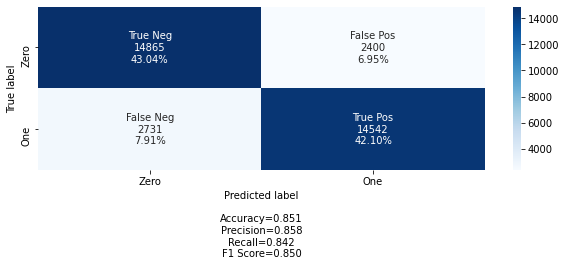

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cf_matrix = confusion_matrix(y_test, nbc_predict)
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)



#plt.figure(figsize=(16,9))
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(cf_matrix, 
                      group_names=labels,
                      categories=categories, 
                      figsize=(10,3),
                      cmap='Blues')